In [250]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
cols = ["Ethnicity","ConvertedComp"]
data = pd.read_csv("C:/Users/Hp/Downloads/survey_results_public.csv",usecols=cols)
#data = data.replace('NA', np.nan)
data.dropna(inplace=True)

In [251]:
#Normalizing data into 0 to 1
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].min())/(data['ConvertedComp'].max()-data['ConvertedComp'].min())

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

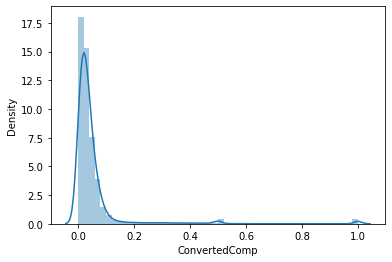

In [252]:
#histogram for normality check 
sns.distplot(data['ConvertedComp'])

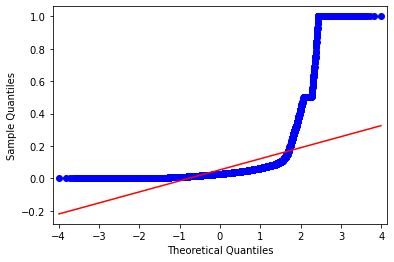

In [253]:
# q-q plot
qqplot(data['ConvertedComp'], line='r')
plt.show()

In [254]:
#From the histogram and q-q plot, we see that data does not follow normal distribution.
#Now we will try to transform data so that it is more normally distributed.

In [255]:
#Removing outliers
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = Q3-Q1

data_out = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

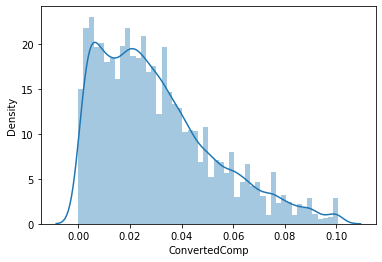

In [256]:
#Histogram after removing outliers 
sns.distplot(data_out['ConvertedComp'])

<ipython-input-257-2fe5b785a496>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

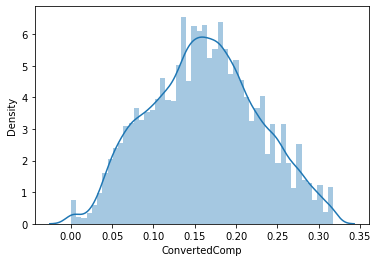

In [257]:
#Square root transformation
data_out['ConvertedComp']=data_out['ConvertedComp']**(.5)
sns.distplot(data_out['ConvertedComp'])

In [258]:
#Now the histogram looks bell shaped, indicating normality.

In [259]:
#Group preparation for ANOVA Test

ethnicity_white_european= data_out['Ethnicity'].str.contains('White or of European descent', na= False)
salary_white_european=data_out[ethnicity_white_european]['ConvertedComp']

ethnicity_black_african= data_out['Ethnicity'].str.contains('Black or of African descent', na= False)
salary_black_african=data_out[ethnicity_black_african]['ConvertedComp']

ethnicity_east_asian= data_out['Ethnicity'].str.contains('East Asian', na= False)
salary_east_asian=data_out[ethnicity_east_asian]['ConvertedComp']

salary_white_european=pd.to_numeric(salary_white_european)
salary_black_african=pd.to_numeric(salary_black_african)
salary_east_asian=pd.to_numeric(salary_east_asian)


salary_white_european=salary_white_european[salary_white_european>0]
salary_black_african=salary_black_african[salary_black_african>0]
salary_east_asian=salary_east_asian[salary_east_asian>0]

In [260]:
#We also have to check if all groups have the same variance or not.

In [261]:
result=stats.levene(salary_white_european,salary_black_african,salary_east_asian)
print(result)

LeveneResult(statistic=143.84771653579153, pvalue=8.407173026939959e-63)


In [262]:
#As p value is 8.407173026939959e-63. We can say variances are not same.

<AxesSubplot:>

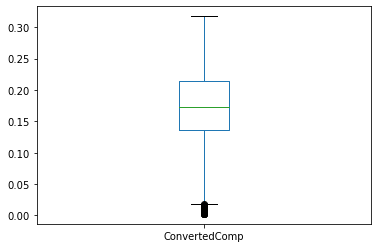

In [263]:
salary_white_european.plot.box()

<AxesSubplot:>

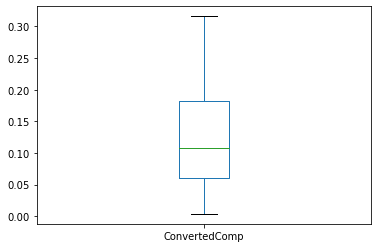

In [264]:
salary_black_african.plot.box()

<AxesSubplot:>

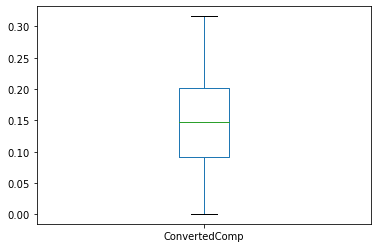

In [265]:
salary_east_asian.plot.box()

In [266]:
#From the box plots, we see that variances are not same. But variances of two groups look similar and
#the other one is a bit smaller.
#As we have transformed data into a normalized form, we can ignore this minor difference and do ANOVA test.

In [267]:
#ANOVA
print(f_oneway(salary_white_european, salary_black_african, salary_east_asian))

F_onewayResult(statistic=379.6462715476473, pvalue=7.058914407714443e-163)


In [245]:
#The F test statistic is 379.6462715476473 and the corresponding p-value is 7.058914407714443e-163.
#Since the p-value is less than .05, we reject the null hypothesis.
#This means we have sufficient evidence to say that there is a difference
#in salaries among the three ethnic groups.